In [102]:
import numpy as np

matrixx = np.array([
    ["", int(19), "a", "b"],
    ["", int(2), "b", "c"],
    ["", int(2), "d", "c"],
    ["", int(4), "d", "b"],
    ["", int(7), "d", "a"],
    ["", int(44), "b", "e"],
    ["", int(14), "f", "g"],
    ["", int(3), "g", "a"],
    ["", int(5), "e", "f"],
    ["", int(8), "h", "g"],
    ["", int(1), "h", "e"],
    ["", int(10), "i", "j"],
    ["", int(6), "h", "i"],
    ["", int(3), "k", "j"],
    ["", int(9), "k", "l"],
    ["", int(4), "m", "l"],
    ["", int(2), "m", "n"],
    ["", int(5), "n", "o"],
    ["", int(11), "o", "p"],
    ["", int(7), "p", "m"]
])

print(matrixx)

[['' '19' 'a' 'b']
 ['' '2' 'b' 'c']
 ['' '2' 'd' 'c']
 ['' '4' 'd' 'b']
 ['' '7' 'd' 'a']
 ['' '44' 'b' 'e']
 ['' '14' 'f' 'g']
 ['' '3' 'g' 'a']
 ['' '5' 'e' 'f']
 ['' '8' 'h' 'g']
 ['' '1' 'h' 'e']
 ['' '10' 'i' 'j']
 ['' '6' 'h' 'i']
 ['' '3' 'k' 'j']
 ['' '9' 'k' 'l']
 ['' '4' 'm' 'l']
 ['' '2' 'm' 'n']
 ['' '5' 'n' 'o']
 ['' '11' 'o' 'p']
 ['' '7' 'p' 'm']]


In [103]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Tree:
    def __init__ (self,name):
        self.name=name
        self.next=[]
        self.components=[self.name]
    def __str__(self):
        return f"{self.name} {self.next}"
    def __repr__(self):
        return f"Tree(name='{self.name}', next={self.next})"
    @classmethod
    def add(cls, tree1, tree2):
        if not tree1.next:
            tree1.next.append(tree2)
        else:
            tree1.next.append(tree2)
        tree1.components = tree1.components + tree2.components
        del tree2

def find_min_span_edges(pseudomatrix):
    sorted_indices = np.lexsort((pseudomatrix[:, 1].astype(int),))
    E = pseudomatrix[sorted_indices]
    names= np.unique(pseudomatrix[:, 2:])
    name_dict= {letter:i for i, letter in enumerate(names)}
    E[:,0]=''
    trees=[]
    for item in names:
        trees.append(Tree(item))
        x=0
    for i,item in enumerate(E):
        while len(set(name_dict.values()))>1:
            min0,min1,min2=E[x][1],E[x][2],E[x][3] #get the next line in the matrix to get the letters/names of the trees
            tree1_id= name_dict[min1] #getting the positions of the letters in the current list of trees
            tree2_id= name_dict[min2]
            if tree2_id==tree1_id:
                x+=1
                break
            else:
                E[x][0]="*"
                tree1=trees[tree1_id] #get the first tree
                tree2=trees[tree2_id] #get he second tree
                Tree.add(tree1,tree2) #merge the two trees, meaning that our tree-list gets shorter. PROBLEM THOUGH: the last it. does not fully merge right now----
                trees.pop(tree2_id) #remove the tree that we just merged into another tree
                if tree1_id<tree2_id:
                    orig_tree2_id=tree2_id
                    name_dict[min2]=tree1_id # update the number associated with the letter/treee in the dictionary
                    for key in name_dict:
                        if name_dict[key] >= orig_tree2_id:
                            name_dict[key] -= 1
                else:
                    orig_tree1_id=tree1_id
                    name_dict[min1]=tree2_id # update the number associated with the letter/treee in the dictionary
                    for key in name_dict:
                        if name_dict[key] >= orig_tree1_id:
                            name_dict[key] -= 1
                x+=1
    res_mat=E
    return res_mat



In [104]:
edges_used=find_min_span_edges(matrixx)
print(edges_used)

[['*' '1' 'h' 'e']
 ['*' '2' 'b' 'c']
 ['*' '2' 'd' 'c']
 ['*' '2' 'm' 'n']
 ['*' '3' 'g' 'a']
 ['*' '3' 'k' 'j']
 ['' '4' 'd' 'b']
 ['*' '4' 'm' 'l']
 ['*' '5' 'e' 'f']
 ['*' '5' 'n' 'o']
 ['*' '6' 'h' 'i']
 ['*' '7' 'd' 'a']
 ['*' '7' 'p' 'm']
 ['*' '8' 'h' 'g']
 ['*' '9' 'k' 'l']
 ['*' '10' 'i' 'j']
 ['' '11' 'o' 'p']
 ['' '14' 'f' 'g']
 ['' '19' 'a' 'b']
 ['' '44' 'b' 'e']]


In [110]:
def get_visiting_order(res_matrix,source_node):
    edges=[]
    edges_in_min_path=[]
    for row in res_matrix:
        weight = int(row[1])  # Extract the weight from the second column
        node1 = row[2]  # Extract the first node from the third column
        node2 = row[3]  # Extract the second node from the fourth column
        edges.append((node1, node2, {'weight': weight}))  # Add the tuple to the list
    for row in res_matrix:
        if row[0]=="*":  # Extract the weight from the second column
            node1 = row[2]  # Extract the first node from the third column
            node2 = row[3]  # Extract the second node from the fourth column
            edge=tuple(sorted([node1,node2]))
            edges_in_min_path.append(edge) # Add the tuple to the list
    G = nx.Graph()
    G.add_nodes_from(np.unique(res_matrix[:, 2:]))
    G.add_edges_from(edges)
    shortest_path=edges_in_min_path
    pos = nx.spring_layout(G)
    edge_colors = ['deeppink' if e in shortest_path else 'lavender' for e in G.edges()] #
    nx.draw(G, pos, with_labels=True, node_color='bisque', edge_color=edge_colors, width=2, font_size=10)
    # Show the plot
    plt.show() 
    dfs_order = list(nx.dfs_tree(G, source=source_node)) #I guess we can use the middle string as the source node or something. or one of the ones that's the most different from the others to hopefully start "at a side".
    #and really consider using another method than depth-first! like "nx.bfs_edges"
    return dfs_order

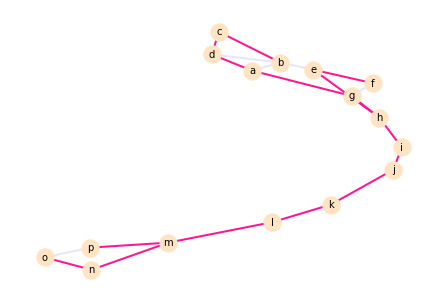

TypeError: 'list' object is not callable

In [111]:
test=get_visiting_order(edges_used,"o")
print(str(test))

In [53]:
mini_mat= np.array([["","a","b","c"],["a",0,1,2],["b",1,0,3],["c",2,3,0]])


def from_matrix_to_pseudomatrix(matrix):
    print(matrix)
    pseudomatrix=[]
    for element in matrix[1:]:
        for sub_ele in element[]
        print(element)
        



from_matrix_to_pseudomatrix(mini_mat)
    

[['' 'a' 'b' 'c']
 ['a' '0' '1' '2']
 ['b' '1' '0' '3']
 ['c' '2' '3' '0']]
['a' '0' '1' '2']
['b' '1' '0' '3']
['c' '2' '3' '0']


In [83]:
import numpy as np

def convert_format_mat_to_pseudomat(mini_mat):
    # Get the node names (excluding the first row and first column)
    node_names = mini_mat[0, 1:]
    
    # Initialize an empty list to store the rows of the new format
    matrixx_rows = []
    print(len(mini_mat))
    print(mini_mat)
    x=len(mini_mat)-1
    processed_edges=set()
    # Process the mini_mat to generate the rows of the new format
    for i, row in enumerate(mini_mat[1:, 1:]):
        for j, distance in enumerate(row):
            if i != j:
                node1 = mini_mat[i + 1, 0]
                node2 = mini_mat[0, j + 1]
                edge = (node1, node2) if node1 < node2 else (node2, node1)
                if edge not in processed_edges:
                    matrixx_rows.append(["", int(distance), node1, node2])
                    processed_edges.add(edge)
    
    # Convert the list of rows to a NumPy array
    matrixx_np = np.array(matrixx_rows)
    
    return matrixx_np

# Example usage:
mini_mat = np.array([["","a","b","c"],["a",0,1,2],["b",1,0,3],["c",2,3,0]])
matrixx = convert_format_mat_to_pseudomat(mini_mat)
print(matrixx)

4
[['' 'a' 'b' 'c']
 ['a' '0' '1' '2']
 ['b' '1' '0' '3']
 ['c' '2' '3' '0']]
[['' '1' 'a' 'b']
 ['' '2' 'a' 'c']
 ['' '3' 'b' 'c']]


In [101]:
def translate_to_num(visiting_order,s1_idx):
    translated_vis_order=[]
    for element in visiting_order:
        ascii_value = ord(element)
        number_in_alphabet = ascii_value - ord('A') + 1
        translated_vis_order.append(number_in_alphabet)
    print(translated_vis_order)
    translated_vis_order[s1_idx]=0
    translated_vis_order=[num - 1 if num > (s1_idx) else num for num in translated_vis_order]
    return translated_vis_order

listen=['A','B','C','D']
index=int(2)
translate_to_num(listen,index)






[1, 2, 3, 4]


[1, 2, 0, 3]